In [157]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from nltk.tokenize import sent_tokenize, word_tokenize
import io

import os

In [158]:
import matplotlib as mpl

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [159]:
def counts2loglog(counts):
    f = counts.T[1].astype(int)
    f = f/np.sum(f)    
    np.savetxt("/tmp/tmp", f)
    A = ! raw2binned -R 0 -f /tmp/tmp
    x, y = np.array([line.split("\t") for line in A if line[0]!="#"]).astype(float).T
    return x, y

def rtimes2loglog(rtimes):
    f = np.concatenate([x/x.mean() for _, x in ranks_rtimes])
    np.savetxt("/tmp/tmp", f)
    A = ! raw2binned -R 0 -f /tmp/tmp
    x, y = np.array([line.split("\t") for line in A if line[0]!="#"]).astype(float).T
    return x, y

def sentence_lengths2loglog(sentence_lengths):
    f = sentence_lengths
    np.savetxt("/tmp/tmp", f)
    A = ! raw2binned -R 1 -b 20 -f /tmp/tmp
    x, y = np.array([line.split("\t") for line in A if line[0]!="#"]).astype(float).T
    return x, y
    
def get_return_times(w, tokens):
    return np.diff([i for i,b in enumerate([x==w for x in tokens]) if b])

In [175]:
PATH_TO_DATA = "../../gutenberg/data/"
BOOK = "PG35688"

In [176]:
tokens = np.loadtxt(os.path.join(PATH_TO_DATA,"tokens",f"{BOOK}_tokens.txt"), dtype=str)
counts = np.loadtxt(os.path.join(PATH_TO_DATA,"counts",f"{BOOK}_counts.txt"), dtype=str)
with io.open(os.path.join(PATH_TO_DATA,"text",f"{BOOK}_text.txt")) as f:
    text = f.read()

ranks_rtimes = [ (r+1, get_return_times(w, tokens)) for r, (w, c) in enumerate(counts) if int(c)>40]
w_to_r = {b:a+1 for a, b in enumerate(counts.T[0])}
tokens_asr = [w_to_r[w] for w in tokens]
sentence_lengths = [ len(word_tokenize(x)) for x in sent_tokenize(text)]

Text(0,0.5,'Rank')

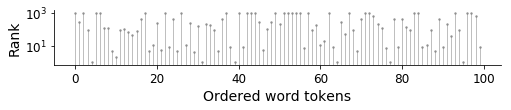

In [177]:
fig, ax = plt.subplots(1, 1, figsize=(8,1))
y = tokens_asr[0:100]
x = range(len(y))
yy = np.concatenate([[0, t, None] for t in y ])
xx = np.concatenate([[t, t, None] for t in x])
ax.plot(xx, yy, lw=0.5, color="0.5")
ax.scatter(x, y, s=2, color="0.6")
ax.set_yscale("log")
ax.set_xlabel("Ordered word tokens")
ax.set_ylabel("Rank")


Text(0,0.5,'$\\mathrm{Prob}( f )$')

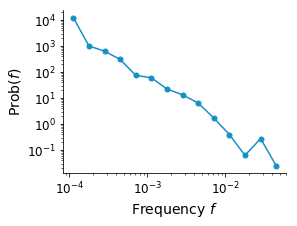

In [178]:
x, y = counts2loglog(counts)
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.loglog(x, y, "o-", markersize=5, color="#178fc6")
ax.set_xlabel("Frequency $f$")
ax.set_ylabel("$\mathrm{Prob}( f )$")

Text(0,0.5,'$\\mathrm{Prob}( \\tau / \\langle \\tau \\rangle )$')

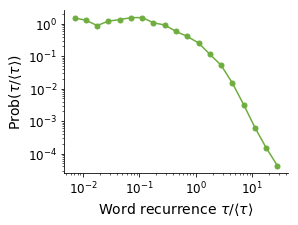

In [189]:
x, y = rtimes2loglog(ranks_rtimes)
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.loglog(x, y, "o-", markersize=5, color="#6ead3e")
ax.set_xlabel("Word recurrence $\\tau / \\langle \\tau \\rangle$")
ax.set_ylabel("$\mathrm{Prob}( \\tau / \\langle \\tau \\rangle )$")


Text(0,0.5,'$\\mathrm{Prob}( \\omega)$')

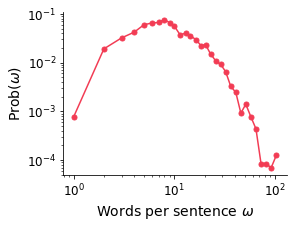

In [180]:
x, y = sentence_lengths2loglog(sentence_lengths)
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.loglog(x, y, "o-", markersize=5, color="#f23c54")
ax.set_xlabel("Words per sentence $\omega$")
ax.set_ylabel("$\mathrm{Prob}( \omega)$")